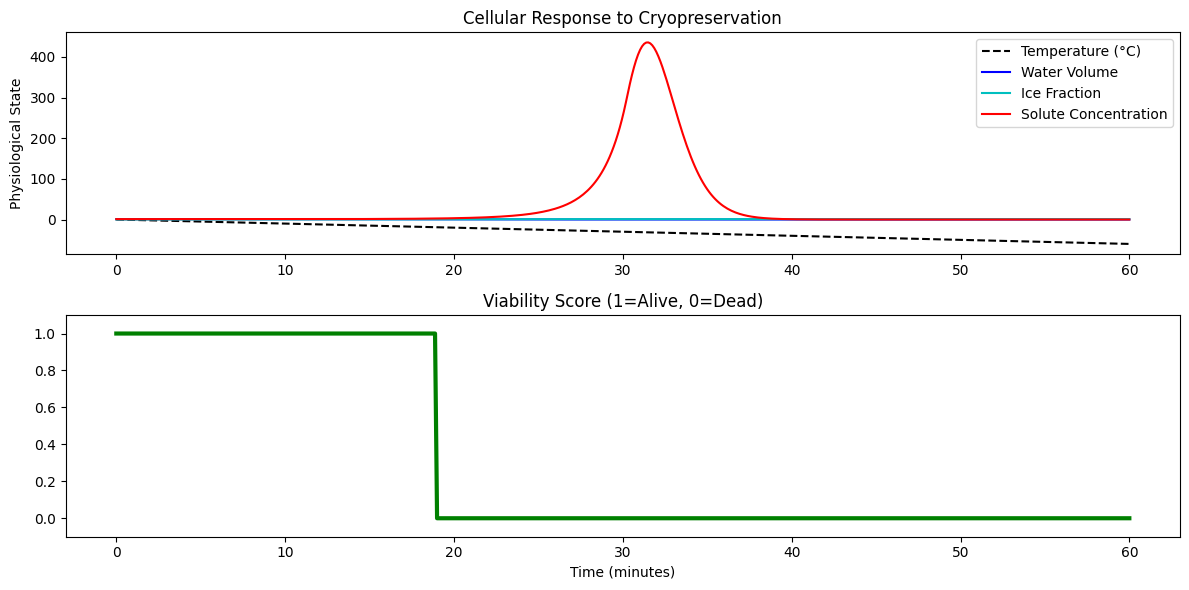

In [1]:
# Cell Viability Simulation Under Cryopreservation
# Author: Mudassir Waheed
# Date: 2025

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters (simplified physiological model)
initial_water_volume = 1.0      # mL
initial_solute_concentration = 1.0  # mol/L
cooling_rate = -1.0  # deg C per minute (negative = cooling)
freezing_threshold = -10  # degrees C
toxicity_threshold = 2.5  # mol/L
critical_ice_fraction = 0.6  # Beyond this, cell bursts

# Time setup
time = np.linspace(0, 60, 500)  # simulate for 60 minutes

# Temperature function (linear cooling)
def temp_profile(t):
    return 0 + cooling_rate * t  # starts at 0°C and drops

# ODE system: [water_volume, ice_fraction, solute_conc]
def model(y, t):
    water_volume, ice_fraction, solute_conc = y
    T = temp_profile(t)

    # Ice formation starts after freezing threshold
    if T < freezing_threshold:
        d_ice = 0.02 * abs(T - freezing_threshold) * water_volume
    else:
        d_ice = 0

    d_water = -d_ice
    new_water_volume = max(water_volume + d_water, 0.01)
    
    # Osmotic effect (concentration increases as water volume drops)
    new_conc = solute_conc * (water_volume / new_water_volume)
    
    return [d_water, d_ice, new_conc - solute_conc]

# Initial conditions
y0 = [initial_water_volume, 0.0, initial_solute_concentration]

# Solve ODE
solution = odeint(model, y0, time)
water_vol, ice_frac, solute_conc = solution.T

# Viability scoring
viability = np.ones_like(time)
viability[(solute_conc > toxicity_threshold) | (ice_frac > critical_ice_fraction)] = 0

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, temp_profile(time), 'k--', label='Temperature (°C)')
plt.plot(time, water_vol, 'b-', label='Water Volume')
plt.plot(time, ice_frac, 'c-', label='Ice Fraction')
plt.plot(time, solute_conc, 'r-', label='Solute Concentration')
plt.legend()
plt.title("Cellular Response to Cryopreservation")
plt.ylabel("Physiological State")

plt.subplot(2, 1, 2)
plt.plot(time, viability, 'g-', linewidth=3)
plt.ylim([-0.1, 1.1])
plt.title("Viability Score (1=Alive, 0=Dead)")
plt.xlabel("Time (minutes)")
plt.tight_layout()
plt.show()


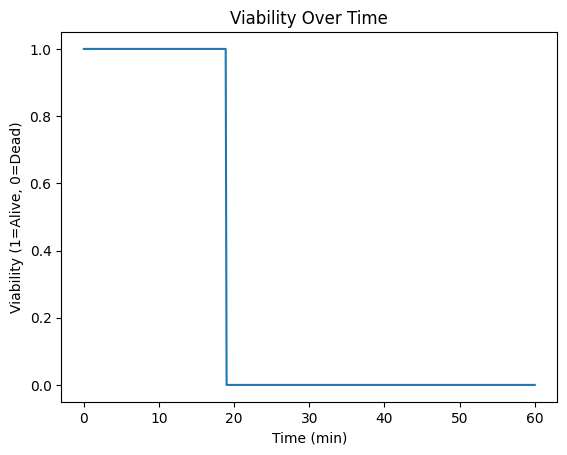

In [4]:
import sys
import os

sys.path.append(os.path.abspath(".."))  # if notebook is inside /notebooks

# OR this if your notebook is in root
# sys.path.append("./src")

from src.cryo_model import simulate_cell_viability
import matplotlib.pyplot as plt

result = simulate_cell_viability()

plt.plot(result["time"], result["viability"])
plt.title("Viability Over Time")
plt.xlabel("Time (min)")
plt.ylabel("Viability (1=Alive, 0=Dead)")
plt.show()
